# TELECOM CUSTOMER CHURN PREDICTION 


## 1. Introduction
What is Customer Churn?

Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

## 2. Loading Library and dataset

In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:

df= pd.read_csv('telco.csv')

## 3. Understand data

* CustomerId
* Gender
* SeniorCitizen: Whether the client is older (1, 0)
* Partner: Whether the client has a partner (Yes, No)
* Dependents: Whether the customer has dependents (Yes, No)
* Tenure: The number of months the customer has stayed with the company
* PhoneService: Whether the customer has phone service (Yes, No)
* MultipleLines: Whether the customer has more than one line (Yes, No, No Telephone service)
* InternetService: Customer's internet service provider (DSL, Fiber optic, No)
* OnlineSecurity: Whether the customer has online security (Yes, No, no Internet service)
* OnlineBackup: Whether the customer has an online backup (Yes, No, no Internet service)
* DeviceProtection: Whether the customer has device protection (Yes, No, no Internet service)
* TechSupport: Whether the customer has technical support (Yes, No, no Internet service)
* StreamingTV: Whether the customer has TV streaming (Yes, No, no Internet service)
* StreamingMovies: Whether the customer is streaming movies (Yes, No, no Internet service)
* Contract: Customer's contract duration (Month to month, One year, Two years)
* PaperlessBilling: Whether the customer has a paperless invoice (Yes, No)
* PaymentMethod: Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges: The total amount charged from the customer
* Churn: Whether the customer uses it (Yes or No)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**what can we see**
* Customers who left within the last month – the column is called Churn
* services-phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* customer, contract, payment method, paperless billing, monthly charges, and total charges
* gender, age range, and if they have partners and dependents

In [5]:
df.shape

(7043, 21)

* 21 columns
* 7043 rows

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


* TotalCharges is object even though it should be numeric, likely due to missing or malformed values

In [7]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

## 4. Missing values

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

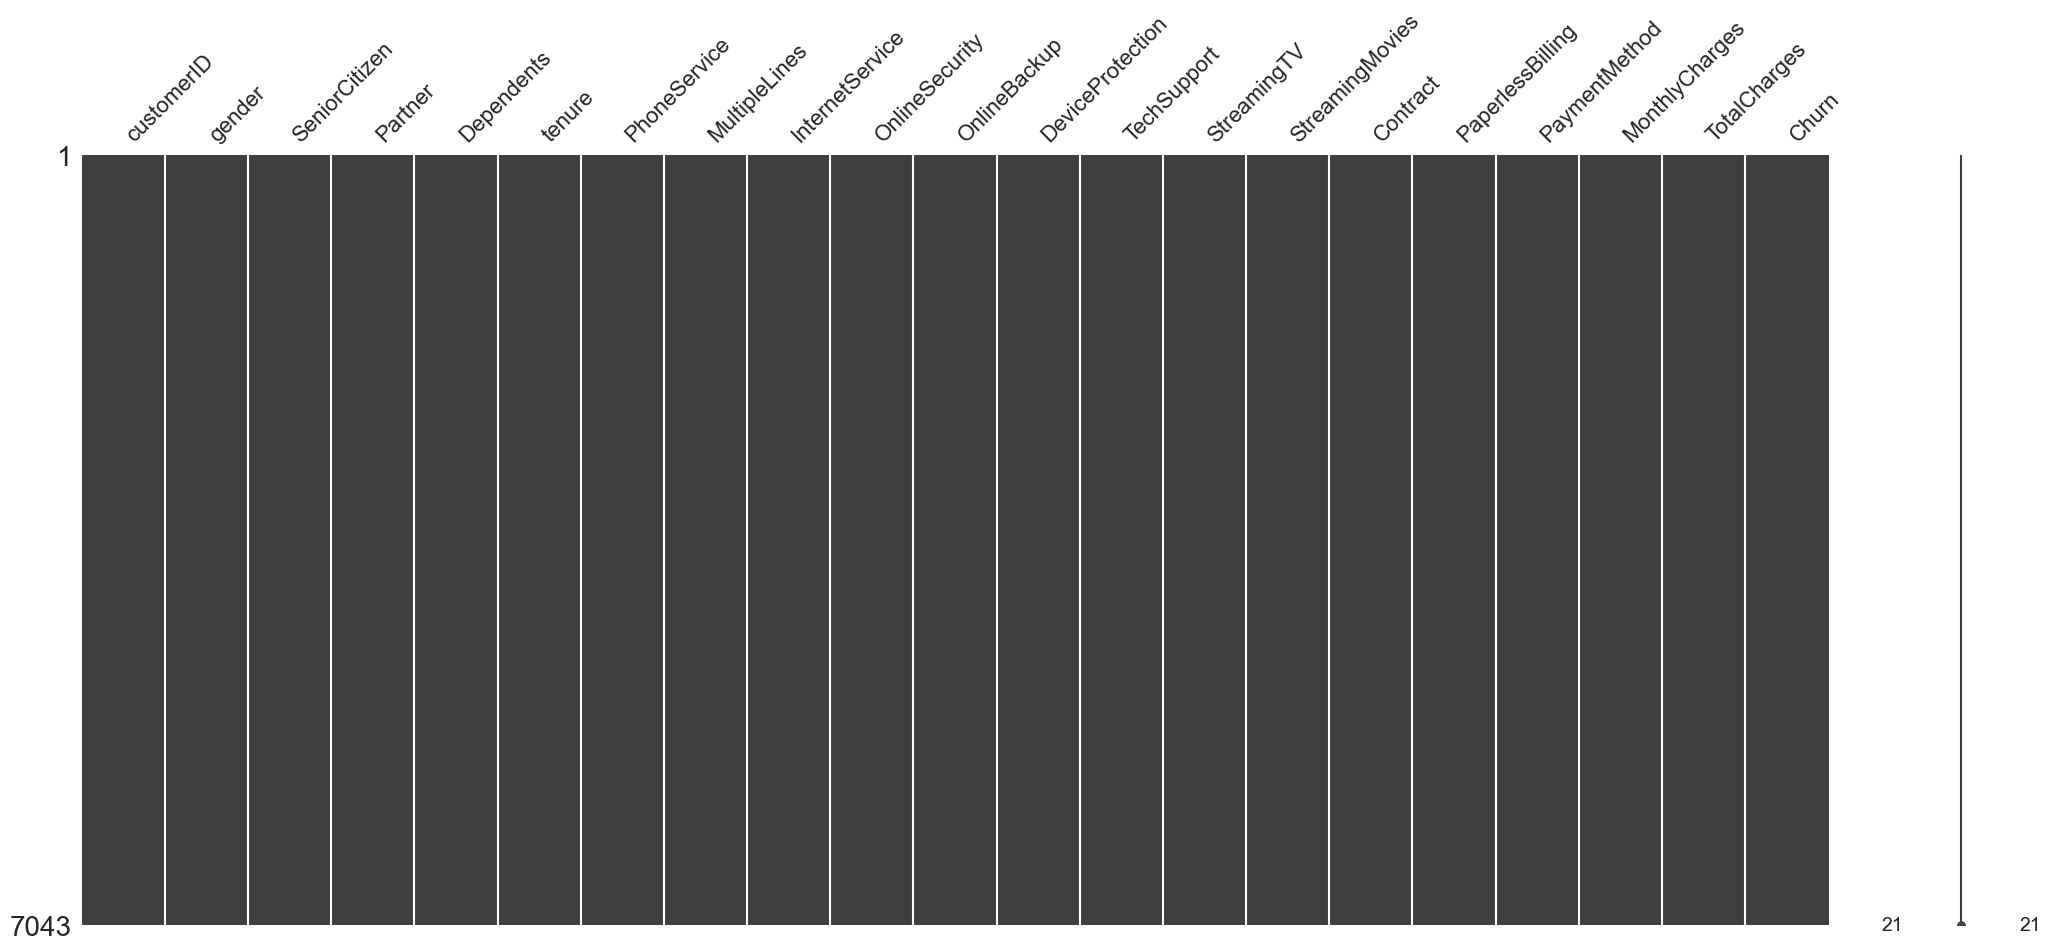

In [9]:
msno.matrix(df);

Using this matrix we can very quickly find the pattern of missingness in the dataset.

no missing value

In [10]:
df.duplicated().sum()

np.int64(0)

No Duplicate value

In [11]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

no duplicate value

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



* Mean Tenure of any customer is 32 months
* A customer can stay at the company anywhere between zero to 72 months.
* More than 50% of customers stay for more than 29 months

## 5. Data cleaning and Encoding

no use of customer id

In [13]:
df = df.drop(['customerID'], axis = 1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


* changing Total charges to number

In [14]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')

In [15]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

* Here we see 11 missing values in TotalCharges

In [16]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* These data have null value
* have monthly charges

replacing nan tenure value to median

In [17]:
median_tenure = df[df['tenure'] > 0]['tenure'].median()
df['tenure'] = df['tenure'].replace(0, median_tenure)

To solve the problem of missing values in TotalCharges column, I decided to fill it with the mean of TotalCharges values.

In [18]:
df.fillna(df["TotalCharges"].mean())

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [20]:
df[np.isnan(df['TotalCharges'])==True]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,29,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,29,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,29,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,29,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,29,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,29,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [21]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.416442,64.761692,2283.300441
std,0.368612,24.526454,30.090047,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


*  Mean Tenure of any customer is 32 months
* A customer can stay at the company anywhere between zero to 72 months.
* More than 50% of customers stay for more than 29 months

In [22]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['MonthlyCharges'] * df['tenure'])

In [24]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [25]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6540
Churn                  2
dtype: int64

In [26]:
df.shape

(7043, 20)

In [27]:
df[df.duplicated()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [28]:

df = df.drop_duplicates()
df.duplicated().sum()  

np.int64(0)

In [29]:
df.shape

(7021, 20)

22 rows are dropped

In [30]:

len(df[df['Churn']=='Yes'])

1857

In [31]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Visualization

In [32]:
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']
# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()

* 26.5 % of customers switched to another firm.
* Customers are 49.5 % female and 50.5 % male.

In [33]:
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2546
Male      2618
Name: Churn, dtype: int64

In [34]:
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    934
Male      923
Name: Churn, dtype: int64

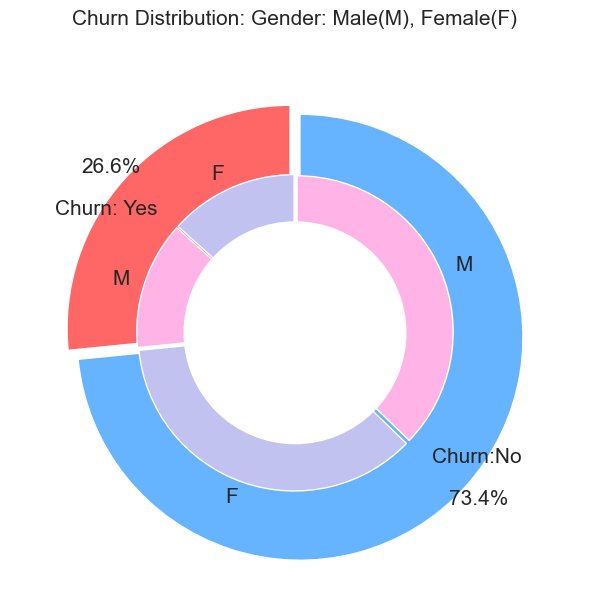

In [35]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution: Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()


There is negligible difference in customer percentage/ count who chnaged the service provider. Both genders behaved in similar fashion when it comes to migrating to another service provider/firm.

In [36]:
fig = px.histogram(
    df, 
    x="Contract", 
    color="Contract", 
    facet_col="Churn",
    title="<b>Contract Distribution by Churn Status</b>"
)
fig.update_layout(
    width=900,
    height=400,
    showlegend=False
)
fig.show()

About 75% of customer with Month-to-Month Contract opted to move out as compared to 13% of customrs with One Year Contract and 3% with Two Year Contract

In [37]:
import plotly.express as px

# Count payment methods
payment_counts = df['PaymentMethod'].value_counts().reset_index()
payment_counts.columns = ['PaymentMethod', 'Count']

# Create horizontal bar chart
fig = px.bar(
    payment_counts,
    x='Count',
    y='PaymentMethod',
    orientation='h',
    color='PaymentMethod',
    text='Count',
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='<b>Customer Count by Payment Method</b>'
)

# Improve layout and labels
fig.update_layout(
    xaxis_title='Number of Customers',
    yaxis_title='Payment Method',
    showlegend=False,
    width=800,
    height=500,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(255,255,255,1)',
    margin=dict(t=80, b=40, l=100, r=40),
    title_font_size=22
)

# Add better text positioning
fig.update_traces(textposition='outside', textfont_size=14)

fig.show()


In [38]:
import plotly.express as px

# Create a crosstab of Churn vs PaymentMethod
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='columns') * 100
payment_churn = payment_churn.reset_index().melt(id_vars='PaymentMethod', var_name='Churn', value_name='Percentage')

# Create grouped bar chart
fig = px.bar(
    payment_churn,
    x='Churn',
    y='Percentage',
    color='PaymentMethod',
    barmode='group',
    text=payment_churn['Percentage'].round(1),
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='<b>Payment Method Preference by Churn Status (in %)</b>'
)

# Improve layout and labels
fig.update_layout(
    width=800,
    height=500,
    bargap=0.2,
    xaxis_title='Churn Status',
    yaxis_title='Percentage of Customers',
    legend_title='Payment Method',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='rgba(255,255,255,1)',
    title_font_size=22,
    margin=dict(t=80, b=40, l=60, r=40)
)

# Text styling
fig.update_traces(textposition='outside', textfont_size=12)

fig.show()


* Major customers who moved out were having Electronic Check as Payment Method.
* Customers who opted for Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

In [39]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()

* A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.
* Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

In [40]:
import plotly.express as px

# Define your color map
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}

# Create the grouped histogram
fig = px.histogram(
    df,
    x="Churn",
    color="Dependents",
    barmode="group",
    title="<b>Churn Distribution by Customer Dependents</b>",
    color_discrete_map=color_map,
    text_auto=True
)



fig.show()


dependents customer are to stay

In [41]:
# Create histogram
fig = px.histogram(
    df,
    x="Churn",
    color="Partner",
    barmode="group",
    title="<b>Churn Distribution by Partner Status</b>",
    text_auto=True
)

fig.show()


no partner are more churn

In [42]:

fig = px.histogram(df, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

* It can be observed that the fraction of senior citizen is very less.
* Most of the senior citizens churn.

In [43]:
import plotly.express as px

# Create % distribution of OnlineSecurity per Churn
security_churn = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='columns') * 100
security_churn = security_churn.reset_index().melt(id_vars='OnlineSecurity', var_name='Churn', value_name='Percentage')

# Define a fresh, clean color palette
color_map = {"Yes": "lime", "No": "cornsilk"}

# Build the grouped bar chart
fig = px.bar(
    security_churn,
    x='Churn',
    y='Percentage',
    color='OnlineSecurity',
    barmode='group',
    text=security_churn['Percentage'].round(1),
    color_discrete_map=color_map,
    title='<b>Churn Distribution Based on Online Security Subscription</b>'
)


fig.show()


In [44]:
import plotly.express as px

# Create normalized crosstab
billing_churn = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='columns') * 100
billing_churn = billing_churn.reset_index().melt(id_vars='PaperlessBilling', var_name='Churn', value_name='Percentage')

# Updated color map
color_map = {"Yes": 'cyan', "No": 'purple'}

# Plot grouped bar chart
fig = px.bar(
    billing_churn,
    x='Churn',
    y='Percentage',
    color='PaperlessBilling',
    barmode='group',
    text=billing_churn['Percentage'].round(1),
    color_discrete_map=color_map,
    title='<b>Churn Distribution Based on Paperless Billing Status</b>'
)


fig.show()


Customers with Paperless Billing are most likely to churn.

In [45]:
fig = px.histogram(df, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers with no TechSupport are most likely to migrate to another service provider.

In [46]:

# Prepare data: % distribution by churn status
phone_churn = pd.crosstab(df['PhoneService'], df['Churn'], normalize='columns') * 100
phone_churn = phone_churn.reset_index().melt(id_vars='PhoneService', var_name='Churn', value_name='Percentage')

# Updated color map
color_map = {"Yes": 'pink', "No": 'red'}

# Create grouped bar chart
fig = px.bar(
    phone_churn,
    x='Churn',
    y='Percentage',
    color='PhoneService',
    barmode='group',
    text=phone_churn['Percentage'].round(1),
    color_discrete_map=color_map,
    title="<b>Churn Distribution Based on Phone Service</b>"
)


fig.show()


very less customer have no phone service

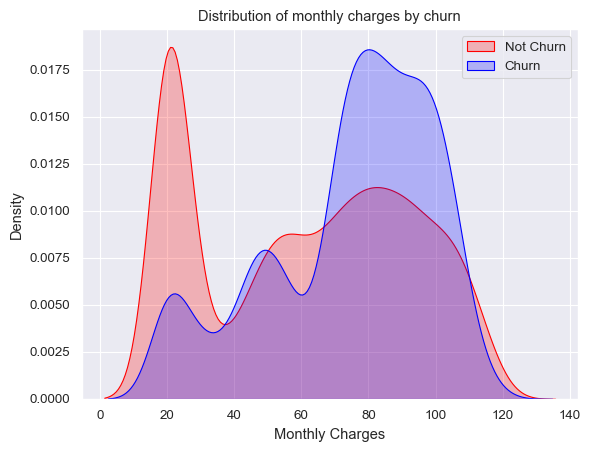

In [47]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with higher Monthly Charges are also more likely to churn

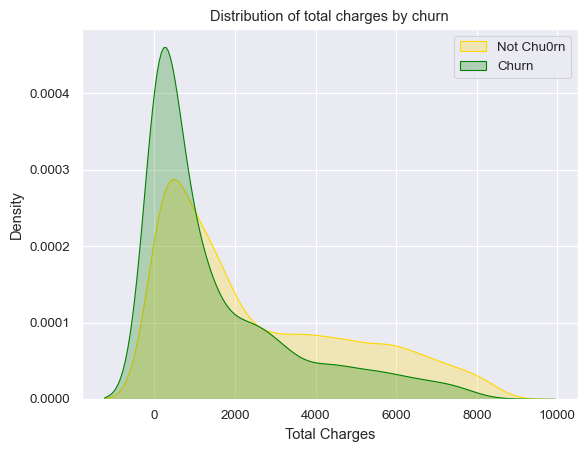

In [48]:
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [49]:

# Create box plot
fig = px.box(
    df,
    x='Churn',
    y='tenure',
    color='Churn',
    points='all',  # show all individual data points
    color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'},  # optional custom color
)

# Update axis labels
fig.update_yaxes(title_text='Tenure (in Months)', showgrid=True)
fig.update_xaxes(title_text='Churn Status', showgrid=False)

fig.show()


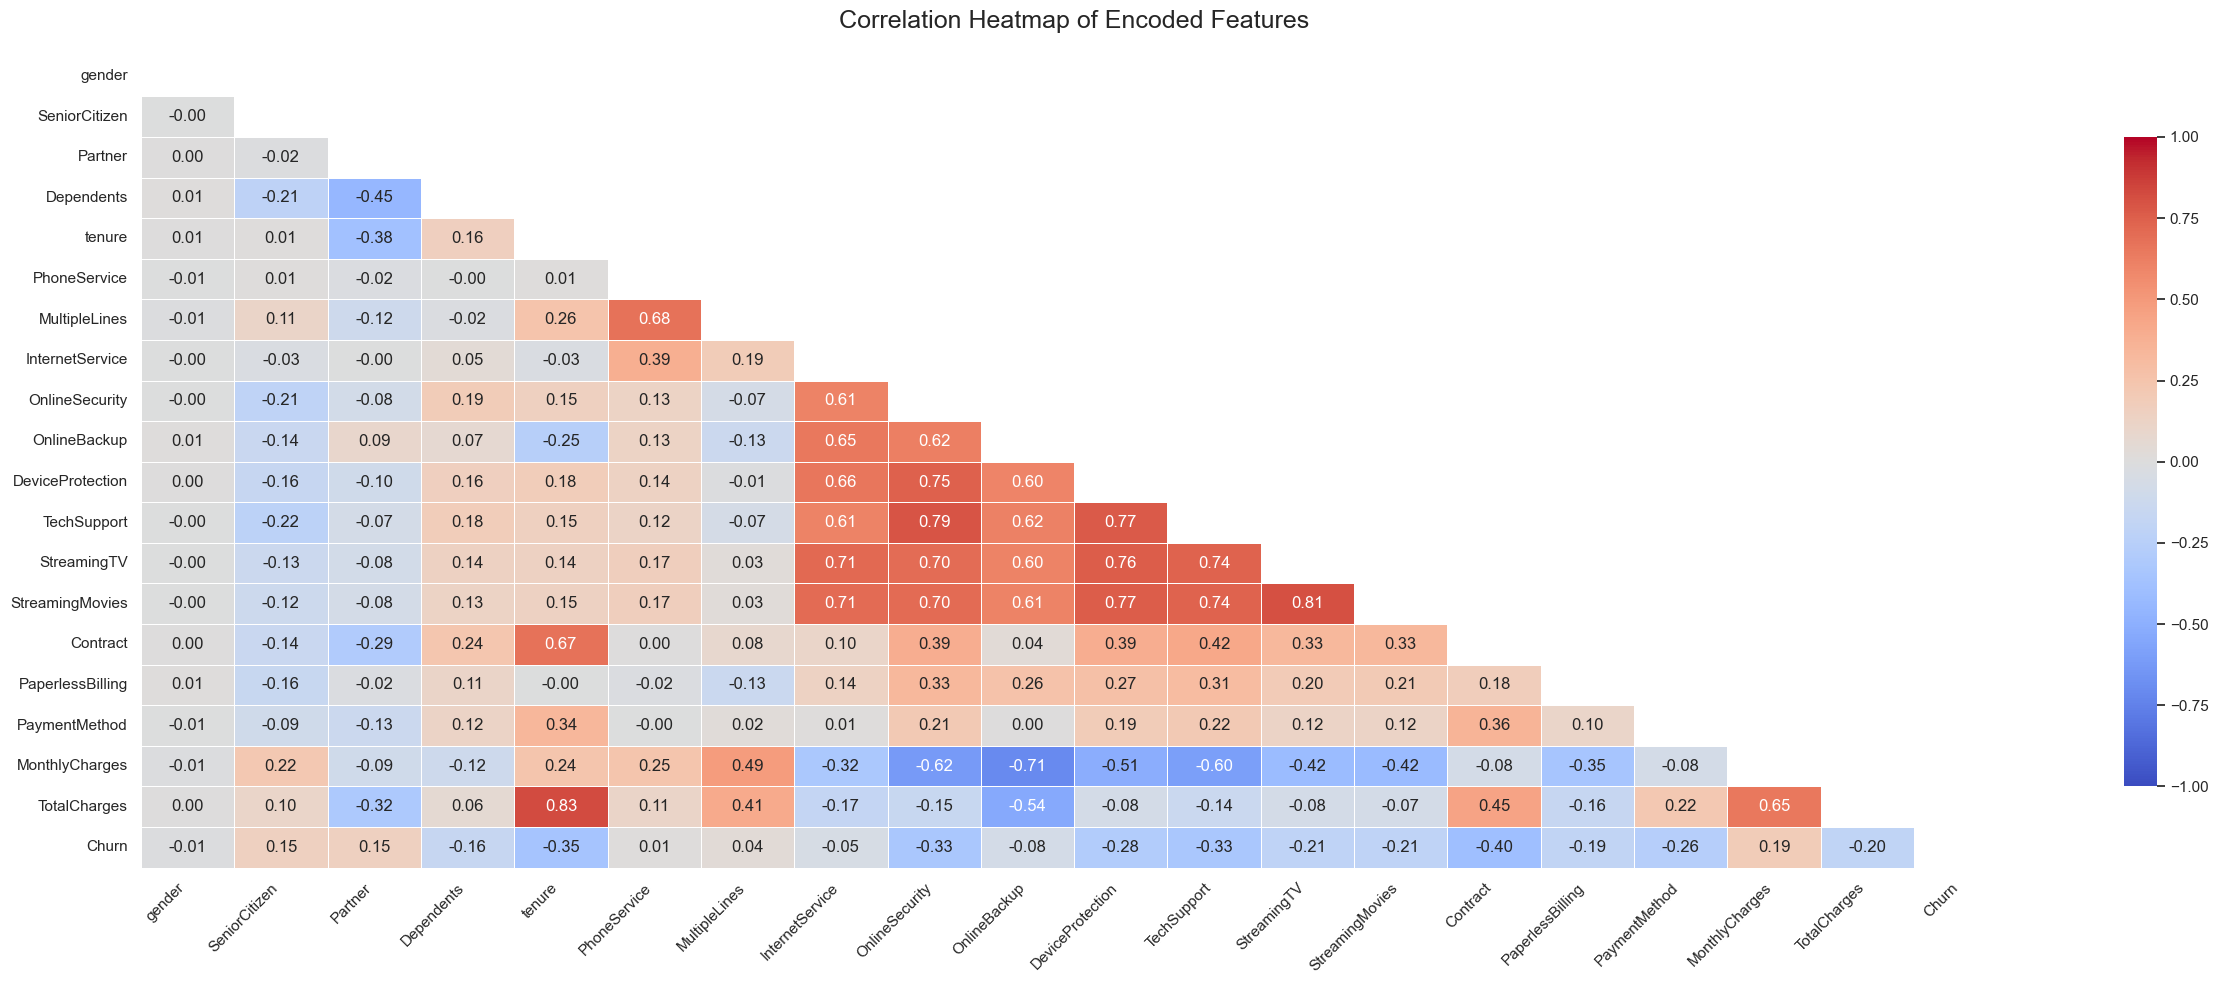

In [50]:
# Factorize categorical columns to numeric so correlation works
encoded_df = df.copy()
encoded_df = encoded_df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# Compute correlation matrix
corr = encoded_df.corr()

# Create upper triangle mask
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set figure size and style
plt.figure(figsize=(25, 10))
sns.set(style="white")

# Plot heatmap
ax = sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    vmin=-1,
    vmax=1,
    cbar_kws={"shrink": 0.8}
)

# Set plot title
plt.title("Correlation Heatmap of Encoded Features", fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



## Feature Engineering

In [51]:
df['New_Total_Services'] = (df[[ 'InternetService', 'OnlineSecurity',
                            'OnlineBackup', 'DeviceProtection', 'TechSupport',
                            'StreamingMovies','StreamingTV','PhoneService']] == 'Yes').sum(axis=1)
df['New_Total_Services']

0       1
1       3
2       3
3       3
4       1
       ..
7038    6
7039    5
7040    1
7041    1
7042    6
Name: New_Total_Services, Length: 7021, dtype: int64

In [52]:

df["New_Avg_Charges"] = df["TotalCharges"] / (df["tenure"] + 1)
df["New_Avg_Charges"]

0        14.925000
1        53.985714
2        36.050000
3        40.016304
4        50.550000
           ...    
7038     79.620000
7039    100.861644
7040     28.870833
7041     61.320000
7042    102.156716
Name: New_Avg_Charges, Length: 7021, dtype: float64

In [53]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    # cat_cols, cat_but_car
    # 1- Categorical variables
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    
    # 2- Numeric but actually categorical (class)
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                        dataframe[col].dtypes != "O"]
    
    # 3 - Categorical but actually each cardinal, that is, unique
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                        dataframe[col].dtypes == "O"]
    
    # 4 - Collect the cat_cols and num_but_cat variables
    cat_cols = cat_cols + num_but_cat
    
    # 5- Subtract the cardinal variable from cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [54]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7021
Variables: 22
cat_cols: 18
num_cols: 4
cat_but_car: 0
num_but_cat: 1


In [55]:
def outlier_thresholds(dataframe, col_name, q1=0.5, q3=0.95):
        quartile1 = dataframe[col_name].quantile(q1)
        quartile3 = dataframe[col_name].quantile(q3)
        interquantile_range = quartile3 - quartile1
        up_limit = quartile3 + 1.5 * interquantile_range
        low_limit = quartile1 - 1.5 * interquantile_range
        return low_limit, up_limit

def check_outlier(dataframe, col_name):
        low_limit, up_limit = outlier_thresholds(dataframe, col_name)
        if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
            return True
        else:
            return False


for col in num_cols:
    print(col, check_outlier(df, col))


tenure False
MonthlyCharges False
TotalCharges False
New_Avg_Charges False


In [56]:
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"New_Tenure_Year"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"New_Tenure_Year"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"New_Tenure_Year"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"New_Tenure_Year"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"New_Tenure_Year"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"New_Tenure_Year"] = "5-6 Year"     
df["New_Tenure_Year"]

0       0-1 Year
1       2-3 Year
2       0-1 Year
3       3-4 Year
4       0-1 Year
          ...   
7038    1-2 Year
7039    5-6 Year
7040    0-1 Year
7041    0-1 Year
7042    5-6 Year
Name: New_Tenure_Year, Length: 7021, dtype: object

## Encoding

In [57]:
def label_encoder(dataframe, binary_cols):
    dataframe[binary_cols] = LabelEncoder().fit_transform(dataframe[binary_cols])
    return dataframe


binary_cols = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() == 2]
for col in binary_cols:
    df = label_encoder(df, col)

In [58]:
# OneHot encoder

def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df2 = one_hot_encoder(df, cols)

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,New_Total_Services_3,New_Total_Services_4,New_Total_Services_5,New_Total_Services_6,New_Total_Services_7,New_Tenure_Year_1-2 Year,New_Tenure_Year_2-3 Year,New_Tenure_Year_3-4 Year,New_Tenure_Year_4-5 Year,New_Tenure_Year_5-6 Year
0,0,0,1,0,1,0,1,29.85,29.85,0,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,False,False,True,False,False,False
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,False,False,False,False,False,False,False
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,False,False,False,True,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,False,False


In [59]:
from sklearn.preprocessing import RobustScaler

for col in num_cols:
    transformer = RobustScaler().fit(df2[[col]])
    df2[col] = transformer.transform(df2[[col]])

df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,New_Total_Services_3,New_Total_Services_4,New_Total_Services_5,New_Total_Services_6,New_Total_Services_7,New_Tenure_Year_1-2 Year,New_Tenure_Year_2-3 Year,New_Tenure_Year_3-4 Year,New_Tenure_Year_4-5 Year,New_Tenure_Year_5-6 Year
0,0,0,1,0,-0.608696,0,1,-0.748846,-0.405023,0,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,0.108696,1,0,-0.248384,0.143458,0,...,True,False,False,False,False,False,True,False,False,False
2,1,0,0,0,-0.586957,1,1,-0.305633,-0.381929,1,...,True,False,False,False,False,False,False,False,False,False
3,1,0,0,0,0.347826,0,0,-0.518929,0.129079,0,...,True,False,False,False,False,False,False,True,False,False
4,0,0,0,0,-0.586957,1,1,0.005540,-0.369099,1,...,False,False,False,False,False,False,False,False,False,False


In [60]:

plt.figure(figsize=(14,7))
df2.corr()['Churn'].sort_values(ascending = False)

Churn                                    1.000000
InternetService_Fiber optic              0.308170
PaymentMethod_Electronic check           0.301544
MonthlyCharges                           0.194508
PaperlessBilling                         0.190891
New_Total_Services_2                     0.156939
SeniorCitizen                            0.151619
New_Total_Services_3                     0.077843
New_Avg_Charges                          0.073763
StreamingTV_Yes                          0.065032
StreamingMovies_Yes                      0.063192
MultipleLines_Yes                        0.041958
New_Tenure_Year_1-2 Year                 0.021189
PhoneService                             0.011323
New_Total_Services_4                     0.007309
gender                                  -0.008763
MultipleLines_No phone service          -0.011323
New_Total_Services_5                    -0.036800
New_Tenure_Year_2-3 Year                -0.042687
New_Tenure_Year_3-4 Year                -0.058702


<Figure size 1400x700 with 0 Axes>

## Train Test split

In [61]:
X = df2.drop(columns = ['Churn'])
y = df2['Churn'].values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [63]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

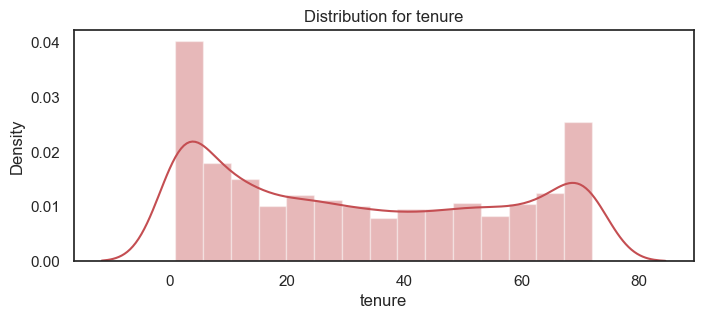

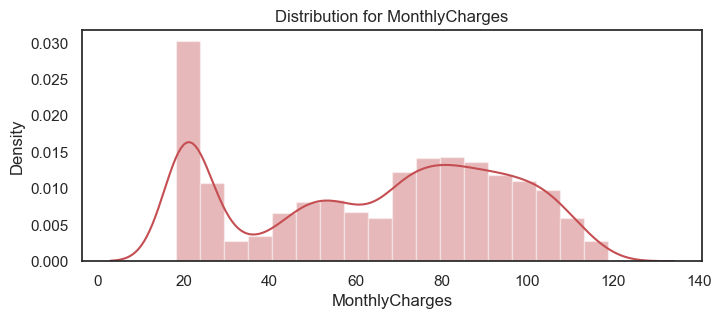

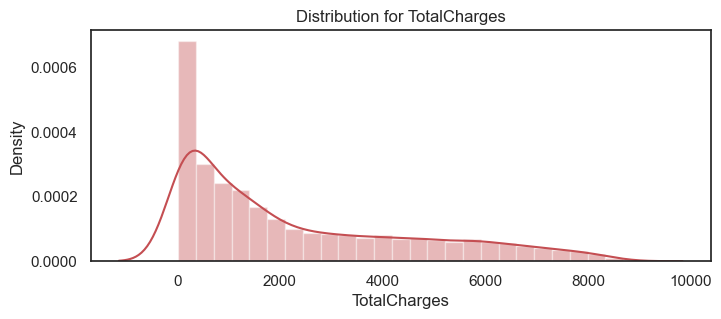

In [64]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)


Since the numerical features are distributed over different value ranges, I will use standard scalar to scale them down to the same range.

**using standard**

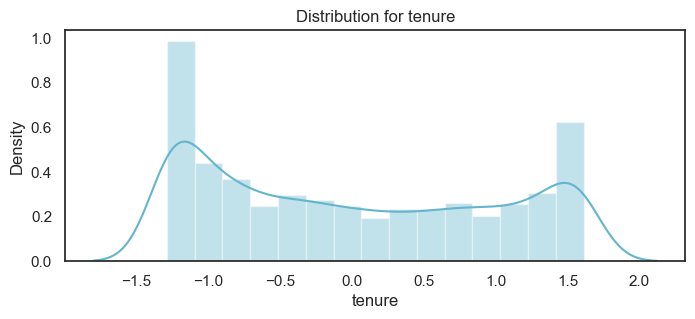

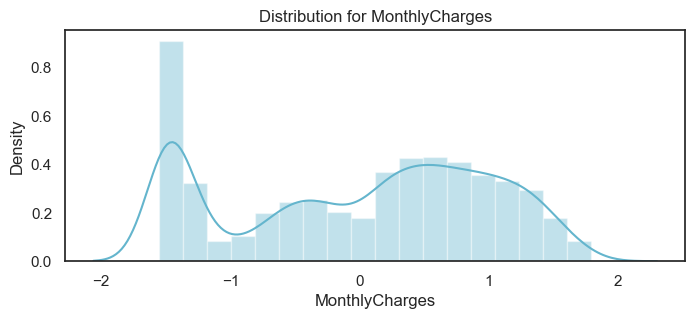

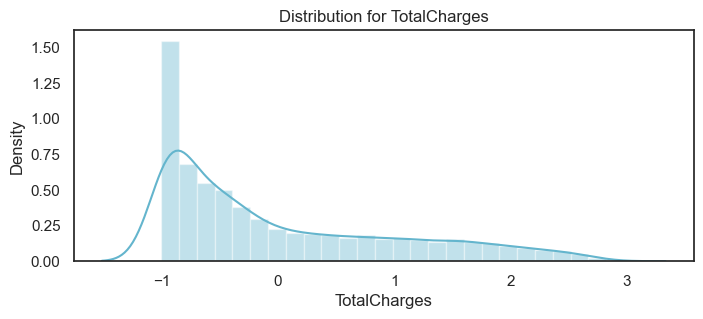

In [65]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in num_cols: distplot(feat, df_std, color='c')

In [66]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [67]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,New_Total_Services_3,New_Total_Services_4,New_Total_Services_5,New_Total_Services_6,New_Total_Services_7,New_Tenure_Year_1-2 Year,New_Tenure_Year_2-3 Year,New_Tenure_Year_3-4 Year,New_Tenure_Year_4-5 Year,New_Tenure_Year_5-6 Year
0,0,0,1,0,-0.608696,0,1,-0.748846,-0.405023,0,...,False,False,False,False,False,False,False,False,False,False
1,1,0,0,0,0.108696,1,0,-0.248384,0.143458,0,...,True,False,False,False,False,False,True,False,False,False
2,1,0,0,0,-0.586957,1,1,-0.305633,-0.381929,1,...,True,False,False,False,False,False,False,False,False,False
3,1,0,0,0,0.347826,0,0,-0.518929,0.129079,0,...,True,False,False,False,False,False,False,True,False,False
4,0,0,0,0,-0.586957,1,1,0.005540,-0.369099,1,...,False,False,False,False,False,False,False,False,False,False


### SMOTE Synthetic Minority Over-sampling Technique - class imbalance

In [68]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [69]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_sm))

Before SMOTE: Counter({np.int64(0): 3614, np.int64(1): 1300})
After SMOTE: Counter({np.int64(0): 3614, np.int64(1): 3614})


## Machine Learning model

### Random forest classifier

In [70]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_model, X_train_sm, y_train_sm, cv=5, scoring='roc_auc')
print(f"Random Forest AUC: {rf_scores.mean():.4f}")


NameError: name 'RandomForestClassifier' is not defined

In [ ]:
rf_model.fit(X_train_sm, y_train_sm)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1550
           1       0.55      0.64      0.59       557

    accuracy                           0.77      2107
   macro avg       0.71      0.73      0.72      2107
weighted avg       0.78      0.77      0.77      2107



using cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_predict

In [ ]:
y_pred_rf = cross_val_predict(rf_model, X_train_sm, y_train_sm, cv=5)

print("Random Forest Classification Report (CV):")
print(classification_report(y_train_sm, y_pred_rf))

Random Forest Classification Report (CV):
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      3614
           1       0.83      0.88      0.85      3614

    accuracy                           0.85      7228
   macro avg       0.85      0.85      0.85      7228
weighted avg       0.85      0.85      0.85      7228



### XGBoost classifier

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_scores = cross_val_score(xgb_model, X_train_sm, y_train_sm, cv=5, scoring='roc_auc')
print(f"XGBoost AUC: {xgb_scores.mean():.4f}")

XGBoost AUC: 0.9159


In [ ]:
xgb_model.fit(X_train_sm, y_train_sm)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1550
           1       0.55      0.63      0.59       557

    accuracy                           0.77      2107
   macro avg       0.71      0.72      0.71      2107
weighted avg       0.78      0.77      0.77      2107



In [ ]:
# cross validation
y_pred_xgb = cross_val_predict(xgb_model, X_train_sm, y_train_sm, cv=5)

print("XGBoost Classification Report (CV):")
print(classification_report(y_train_sm, y_pred_xgb))

XGBoost Classification Report (CV):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83      3614
           1       0.82      0.86      0.84      3614

    accuracy                           0.83      7228
   macro avg       0.84      0.83      0.83      7228
weighted avg       0.84      0.83      0.83      7228



### LightGBM classifier

In [ ]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(random_state=42)
lgbm_scores = cross_val_score(lgbm_model, X_train_sm, y_train_sm, cv=5, scoring='roc_auc')
print(f"LightGBM AUC: {lgbm_scores.mean():.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000679 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] 

In [ ]:
lgbm_model.fit(X_train_sm, y_train_sm)
y_pred_lgbm = lgbm_model.predict(X_test)

print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3614, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000804 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 7228, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1550
           1       0.56      0.68      0.62       557

    accuracy                           0.77      2107
   macro avg       0.72      0.75      0.73      2107
weighted avg       0.79      0.77      0.78      2107



In [ ]:
# cross validation
y_pred_lgbm = cross_val_predict(lgbm_model, X_train_sm, y_train_sm, cv=5)

print("LightGBM Classification Report (CV):")
print(classification_report(y_train_sm, y_pred_lgbm))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] 

In [71]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

NameError: name 'RandomForestClassifier' is not defined

graph of classification report

In [72]:
for name, model in models.items():
    y_pred = cross_val_predict(model, X_train_sm, y_train_sm, cv=5)
    report = classification_report(y_train_sm, y_pred, output_dict=True)
    
    # Convert report to DataFrame and drop 'accuracy', 'macro avg', 'weighted avg'
    df_report = pd.DataFrame(report).T
    df_report = df_report.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')
    
    # Plotting
    df_report[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8, 5))
    plt.title(f'{name} - Precision, Recall, F1-score')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.xticks(rotation=0)
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

NameError: name 'models' is not defined

Confusion matrix

In [73]:
# Plot Confusion Matrix for each model
for name, model in models.items():
    y_pred = cross_val_predict(model, X_train_sm, y_train_sm, cv=5)
    cm = confusion_matrix(y_train_sm, y_pred)
    
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

NameError: name 'models' is not defined

ACCURACY 

In [74]:
accuracies = {}

# Evaluate each model using cross_val_score
for name, model in models.items():
    scores = cross_val_score(model, X_train_sm, y_train_sm, cv=5, scoring='accuracy')
    accuracies[name] = scores.mean()

# Plot the accuracy comparison
plt.figure(figsize=(8, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'salmon', 'lightgreen'])
plt.ylim(0.8, 1)  # Adjust based on your model performance
plt.title('Model Accuracy Comparison (5-Fold CV)')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

NameError: name 'models' is not defined

Random forest has highest accuracy 

ROC/AUC curve

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] [Info] Number of data points in the train set: 5782, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2891, number of negative: 2891
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000591 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1098
[LightGBM] 

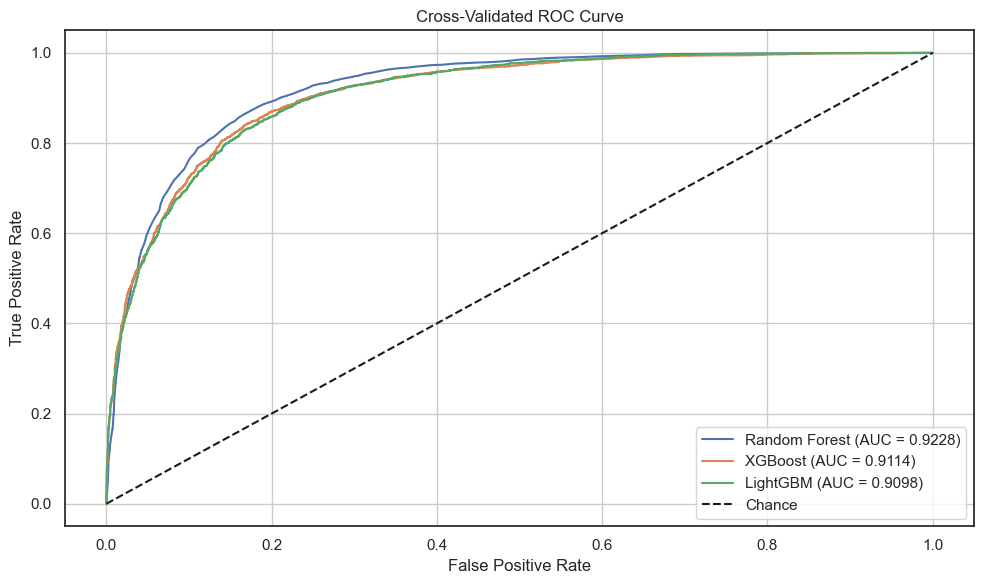

In [85]:


# Ensure binary classification
assert len(set(y_train_sm)) == 2, "This code assumes binary classification."

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

plt.figure(figsize=(10, 6))

# Loop through models and plot AUC-ROC
for name, model in models.items():
    # Get cross-validated probabilities (needed for AUC)
    y_proba = cross_val_predict(model, X_train_sm, y_train_sm, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y_train_sm, y_proba)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot base line
plt.plot([0, 1], [0, 1], 'k--', label='Chance')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cross-Validated ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
joblib.dump(model, "mobile_price_model.pkl")
joblib.dump(X.columns.tolist(), "model_features.pkl")